In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("shot_logs.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [6]:
df.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [7]:
# FGM == SHOT_RESULT
sum((df.SHOT_RESULT == "made") != (df.FGM))

0

In [8]:
df.loc[df.player_id == 203148].player_name.iloc[0]

'brian roberts'

In [9]:
# Number of players
print(len(df.player_id.unique()))
# Mapping of player_id -> name
player_name = {pid : df.loc[df.player_id == pid].player_name.iloc[0] for pid in df.player_id.unique()}

281


In [10]:
# Closest defenders
print(len(df.CLOSEST_DEFENDER_PLAYER_ID.unique()))
defender_name = {pid : df.loc[df.CLOSEST_DEFENDER_PLAYER_ID == pid].CLOSEST_DEFENDER.iloc[0] for pid in df.CLOSEST_DEFENDER_PLAYER_ID.unique()}

474


In [11]:
# Not all defenders are players
for pid in defender_name:
    if pid in player_name:
        continue
        print(pid, player_name[pid], defender_name[pid])
    else:
        #print(pid, defender_name[pid], "not player")

SyntaxError: unexpected EOF while parsing (<ipython-input-11-5f5795787d78>, line 7)

In [33]:
# Disgard qualitative features
from datetime import datetime
df = pd.read_csv("shot_logs.csv")
# Parse game clock
df["GAME_CLOCK_SECS"] = df.apply(lambda row: (datetime.strptime(row.GAME_CLOCK, "%M:%S") - datetime.strptime("", "")).total_seconds(), axis=1)
df['LOCATION'] = df['LOCATION'].astype("category").cat.codes
df['W'] = df['W'].astype("category").cat.codes
df['SHOT_CLOCK'] = df.SHOT_CLOCK.fillna(df.GAME_CLOCK_SECS)
df.drop(['GAME_ID','PTS','MATCHUP','GAME_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id'],axis=1,inplace=True)
df

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,GAME_CLOCK_SECS
0,0,1,24,1,1,10.8,2,1.9,7.7,2,1.3,1,69.0
1,0,1,24,2,1,3.4,0,0.8,28.2,3,6.1,0,14.0
2,0,1,24,3,1,0.0,3,2.7,10.1,2,0.9,0,0.0
3,0,1,24,4,2,10.3,2,1.9,17.2,2,3.4,0,707.0
4,0,1,24,5,2,10.9,2,2.7,3.7,2,1.1,0,634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,0,0,-16,5,3,18.3,5,6.2,8.7,2,0.8,0,112.0
128065,0,0,-16,6,4,19.8,4,5.2,0.6,2,0.6,1,688.0
128066,0,0,-16,7,4,23.0,2,4.2,16.9,2,4.2,1,670.0
128067,0,0,-16,8,4,9.1,4,4.5,18.3,2,3.0,0,157.0


In [35]:
#First, let's try the simple logistic regression

from sklearn import model_selection, linear_model, metrics
import numpy as np

df
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
logistic = linear_model.LogisticRegression()

logistic.fit(X_train / np.std(X_train, 0), y_train)
print(logistic.coef_)
predictions = logistic.predict(X_test)
print(metrics.classification_report(y_test, predictions))

/Users/minghao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[-0.00624884  0.01673795  0.10611878  0.03912723 -0.03263044  0.00542848
   0.11064877 -0.20033061 -0.58983897  0.04624041  0.28594923  0.01320047]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.65     21006
           1       0.56      0.49      0.52     17415

    accuracy                           0.59     38421
   macro avg       0.59      0.58      0.58     38421
weighted avg       0.59      0.59      0.59     38421



              precision    recall  f1-score   support

           0       0.61      0.85      0.71     21021
           1       0.65      0.35      0.45     17400

    accuracy                           0.62     38421
   macro avg       0.63      0.60      0.58     38421
weighted avg       0.63      0.62      0.59     38421



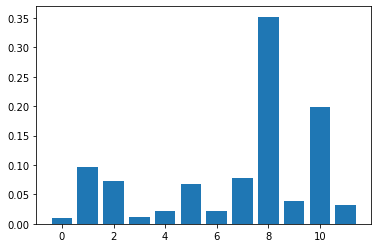

In [41]:
#Let's try sota boosting package

import xgboost
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
xgboost = xgboost.XGBClassifier().fit(X_train,y_train)
predictions = xgboost.predict(X_test)
print(metrics.classification_report(y_test, predictions))
plt.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
plt.show()

              precision    recall  f1-score   support

           0       0.58      0.57      0.57     20964
           1       0.49      0.49      0.49     17457

    accuracy                           0.54     38421
   macro avg       0.53      0.53      0.53     38421
weighted avg       0.54      0.54      0.54     38421



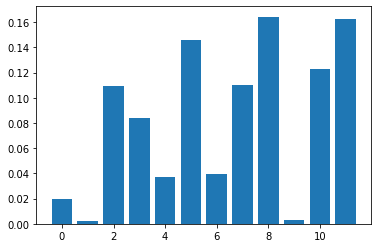

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [45]:
#Let's try vanilla decision tree
from sklearn import tree
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['FGM'],axis=1), 
                                                   df['FGM'], test_size=0.30)
decision = tree.DecisionTreeClassifier().fit(X_train,y_train)
predictions = decision.predict(X_test)
print(metrics.classification_report(y_test, predictions))
plt.bar(range(len(decision.feature_importances_)), decision.feature_importances_)
plt.show()

#source for tree drawing: https://www.kaggle.com/drgilermo/stephen-curry-s-decision-tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision,
                              out_file=f,
                              max_depth = 5,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")



In [ ]:
#Let's try SVM